# Sampling on the Coupling Strength $D_j$

**Yuning Zhang, TU Delft, 2021.10.13**

Study the distribution of coupling strength $D_j$. The location of spin in a disordered ensemble are randomly generated, and the coupling strengths between the central spin and the bath are calculated from the locations.


In [1]:
using Plots
using LaTeXStrings
using Printf
using Statistics

In [8]:
include("SpinEnsemble.jl")

beta_sampling

In [9]:
"""
main session of the workflow.
calculate the decaying curve given by a given set of parameter
========================
Args:
    T: simulation time 
    N: number of spin
    d: dimension
    a: scale of the distributed area, (the volume is a^d)
"""
function main(T::Float64,N::Int, d::Int,a::Float64)
    coeff_sample=rand_bath_dipolar_coefs(N,d,a);
    bin_set=range(-20/a^d, 20/a^d, length = 60)
    fig1=histogram(coeff_sample, bins = bin_set, xlabel=L"D_j", ylabel=L"\Delta P", norm=true)
    println("max: ",maximum(coeff_sample)," min: ",minimum(coeff_sample))
    println("avg: ", mean(coeff_sample),"std: ",std(coeff_sample))
    time=collect(range(0,T,length=1001))
    decay_curve=ensemble_FID(time,coeff_sample)
    fig2=plot(time,decay_curve,xformatter=:scientific,xlabel=L"t", ylabel=L"$\langle S_x(t) \rangle$")
    display(fig1)
    display(fig2)
end;

The system is characterized by following parameters 
```
    T: simulation time 
    N: number of spin
    d: dimension
    a: scale of the distributed area, (the volume is a^d)
```
The central spin is always distributed in zero point and the default z axis (background field) is $(0,0,1)$.

## Basic Distribution and corresponding FID

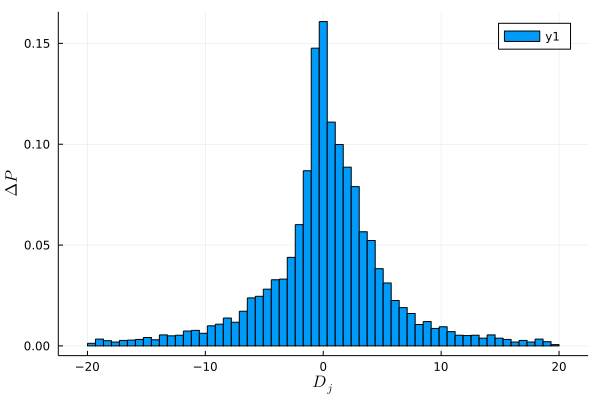

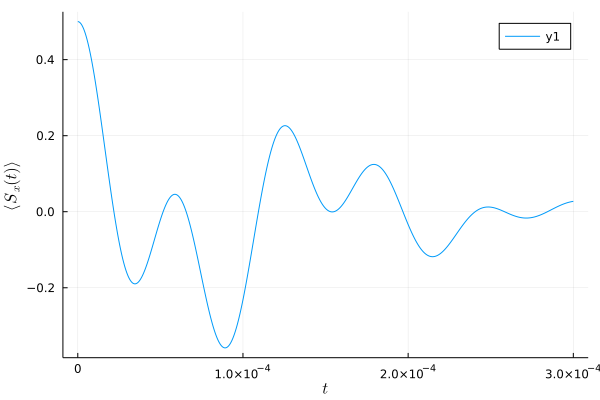

max: 71818.2770351586 min: -30402.130204224868
avg: 4.821667424162582std: 783.6005357345396


In [11]:
main(3e-4,10^4,3,1.0)

### Varying spin density, see how large is the $D_j$ at top 5% (0.95)

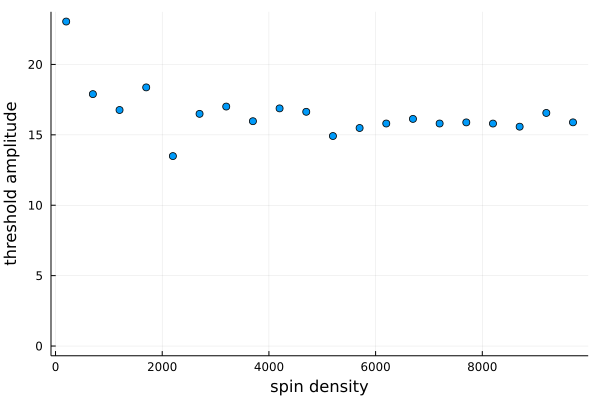

In [12]:
f_list=[100.0*n for n in 2:5:100]
h_s=map(x->transverse_threshold(0.95,x,3,1.0),f_list)
scatter(f_list, h_s,
yrange=[0,maximum(h_s)],
xlabel="spin density",
label=:false,
ylabel="threshold amplitude")

we can fix the density since the scale of $D_j$ doesn't vary with it.

### Varying area scale, see how large is the $D_j$  at top 5% (0.95)

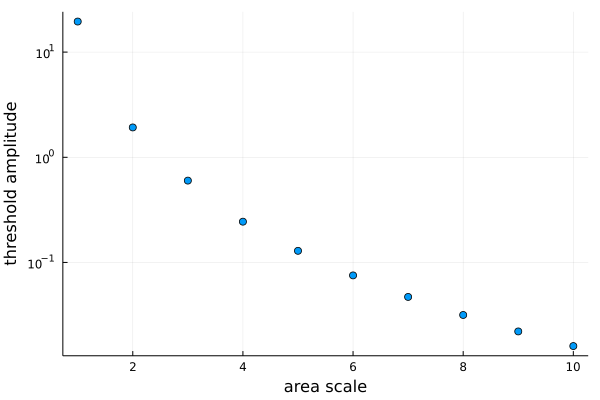

In [13]:
a_list=1:10
h_s=map(x->transverse_threshold(0.95,10^3,3,x),a_list)
scatter(a_list, h_s,
yaxis=:log,
label=:false,
xlabel="area scale",
ylabel="threshold amplitude")

**Plot the normalized distribution under different distributed area**

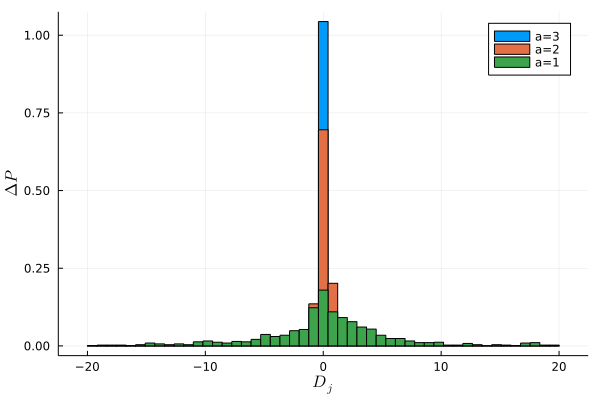

In [27]:
a_list=1:3
d=3
f=10^3
coeff_sample=map(x->rand_bath_dipolar_coefs(x^d*f,d,x),a_list)
bin_set=range(-20/1^d, 20/1^d, length = 50)
fig=histogram(reverse(coeff_sample), bins = bin_set,
xlabel=L"D_j", 
ylabel=L"\Delta P",
label=reverse(["a=1" "a=2" "a=3"]),
norm=:true)

The distribution is peaked more and more as the distributed area growing, since there are more spins in the bath that is far. 